In [7]:
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

#!/usr/bin/env python3
#pip install  rioxarray==0.3.1
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import rasterio
import os
import matplotlib.colors
scriptsdir = os.getcwd()
from scipy.interpolate import griddata
from functools import reduce
import xarray
import itertools
import matplotlib.colors as mcolors
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import warnings

In [3]:
import matplotlib as mpl
def set_plot_param():

    """Set my own customized plotting parameters"""

    import matplotlib as mpl

    mpl.rc('axes',edgecolor='grey')

    mpl.rc('axes',labelcolor='dimgrey')

    mpl.rc('xtick',color='dimgrey')

    mpl.rc('xtick',labelsize=12)

    mpl.rc('ytick',color='dimgrey')

    mpl.rc('ytick',labelsize=12)

    mpl.rc('axes',titlesize=18)

    mpl.rc('axes',labelsize=12)

    mpl.rc('legend',fontsize='large')

    mpl.rc('text',color='dimgrey')
    

    

In [4]:
import os
import pickle
import xarray as xr
# Specify the output directory, habitats, scenarios, SDMs, and GCMs
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/habitats/"
habitats = ["forest", "cropland", "natural_land", "pasture"]

scenarios = ["rcp26", "rcp60"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
time = '65'
# Other initializations remain the same

# Dictionaries for storing the mean values over GCMs
mean_over_gcms_newvalue_hist = {}
mean_over_gcms_newvalue_fut = {}
mean_over_gcms_sumbin_hist = {}
mean_over_gcms_sumbin_fut = {}

# Dictionaries for storing the final mean values over SDMs and GCMs
mean_over_sdms_gcms_newvalue_hist = {}
mean_over_sdms_gcms_newvalue_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

hist= {}
hist_fut= {}

for scenario in scenarios:
    # Initialize dictionaries for each scenario and habitat
    mean_over_gcms_newvalue_hist[scenario] = {}
    mean_over_gcms_newvalue_fut[scenario] = {}
    mean_over_gcms_sumbin_hist[scenario] = {}
    mean_over_gcms_sumbin_fut[scenario] = {}

    mean_over_sdms_gcms_newvalue_hist[scenario] = {}
    mean_over_sdms_gcms_newvalue_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    hist[scenario] = {}
    hist_fut[scenario] = {}
    for habitat in habitats:
        mean_over_gcms_newvalue_hist[scenario][habitat] = []
        mean_over_gcms_newvalue_fut[scenario][habitat] = []
        mean_over_gcms_sumbin_hist[scenario][habitat] = []
        mean_over_gcms_sumbin_fut[scenario][habitat] = []
        hist[scenario][habitat] = {}
        hist_fut[scenario][habitat] = {}
        for sdm in sdms:
            # Temporary lists to store data for each GCM
            temp_hist = []
            temp_fut = []
            temp_sumbin_hist = []
            temp_sumbin_fut = []
            
            hist[scenario][habitat][sdm] = {}
            hist_fut[scenario][habitat][sdm] = {}

            for gcm in gcms:
                # Load pickle files for each habitat
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{habitat}_['{scenario}']_['{time}'].pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{habitat}_['{scenario}']_['{time}'].pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{habitat}_['{scenario}']_['{time}'].pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{habitat}_['{scenario}']_['{time}'].pkl")
                
                
                with open(newvalue_hist_sum_path, "rb") as f:
                    temp_hist.append(pickle.load(f))
                with open(newvalue_future_sum_path, "rb") as f:
                    temp_fut.append(pickle.load(f))
                with open(sum_bin_hist_sum_path, "rb") as f:
                    temp_sumbin_hist.append(pickle.load(f))
                with open(sum_bin_future_sum_path, "rb") as f:
                    temp_sumbin_fut.append(pickle.load(f))
                    
                with open(newvalue_future_sum_path, "rb") as f:
                    hist_data = pickle.load(f)
                hist_fut[scenario][habitat][sdm][gcm] = hist_data 
                
                with open(newvalue_hist_sum_path, "rb") as f:
                    hist_data = pickle.load(f)
                hist[scenario][habitat][sdm][gcm]= hist_data
                

            # Calculate the mean over GCMs and append to the list
            mean_over_gcms_newvalue_hist[scenario][habitat].append(xr.concat(temp_hist, dim='gcm').mean(dim='gcm'))
            mean_over_gcms_newvalue_fut[scenario][habitat].append(xr.concat(temp_fut, dim='gcm').mean(dim='gcm'))
            mean_over_gcms_sumbin_hist[scenario][habitat].append(xr.concat(temp_sumbin_hist, dim='gcm').mean(dim='gcm'))
            mean_over_gcms_sumbin_fut[scenario][habitat].append(xr.concat(temp_sumbin_fut, dim='gcm').mean(dim='gcm'))

        # Calculate the mean over SDMs
        mean_over_sdms_gcms_newvalue_hist[scenario][habitat] = xr.concat(mean_over_gcms_newvalue_hist[scenario][habitat], dim='sdm').mean(dim='sdm')
        mean_over_sdms_gcms_newvalue_fut[scenario][habitat] = xr.concat(mean_over_gcms_newvalue_fut[scenario][habitat], dim='sdm').mean(dim='sdm')
        mean_over_sdms_gcms_sumbin_hist[scenario][habitat] = xr.concat(mean_over_gcms_sumbin_hist[scenario][habitat], dim='sdm').mean(dim='sdm')
        mean_over_sdms_gcms_sumbin_fut[scenario][habitat] = xr.concat(mean_over_gcms_sumbin_fut[scenario][habitat], dim='sdm').mean(dim='sdm')

In [30]:
std_dev_climate_change = np.std([np.mean(hist[scenario][habitat][sdm][gcm]) for sdm in sdms for gcm in gcms])

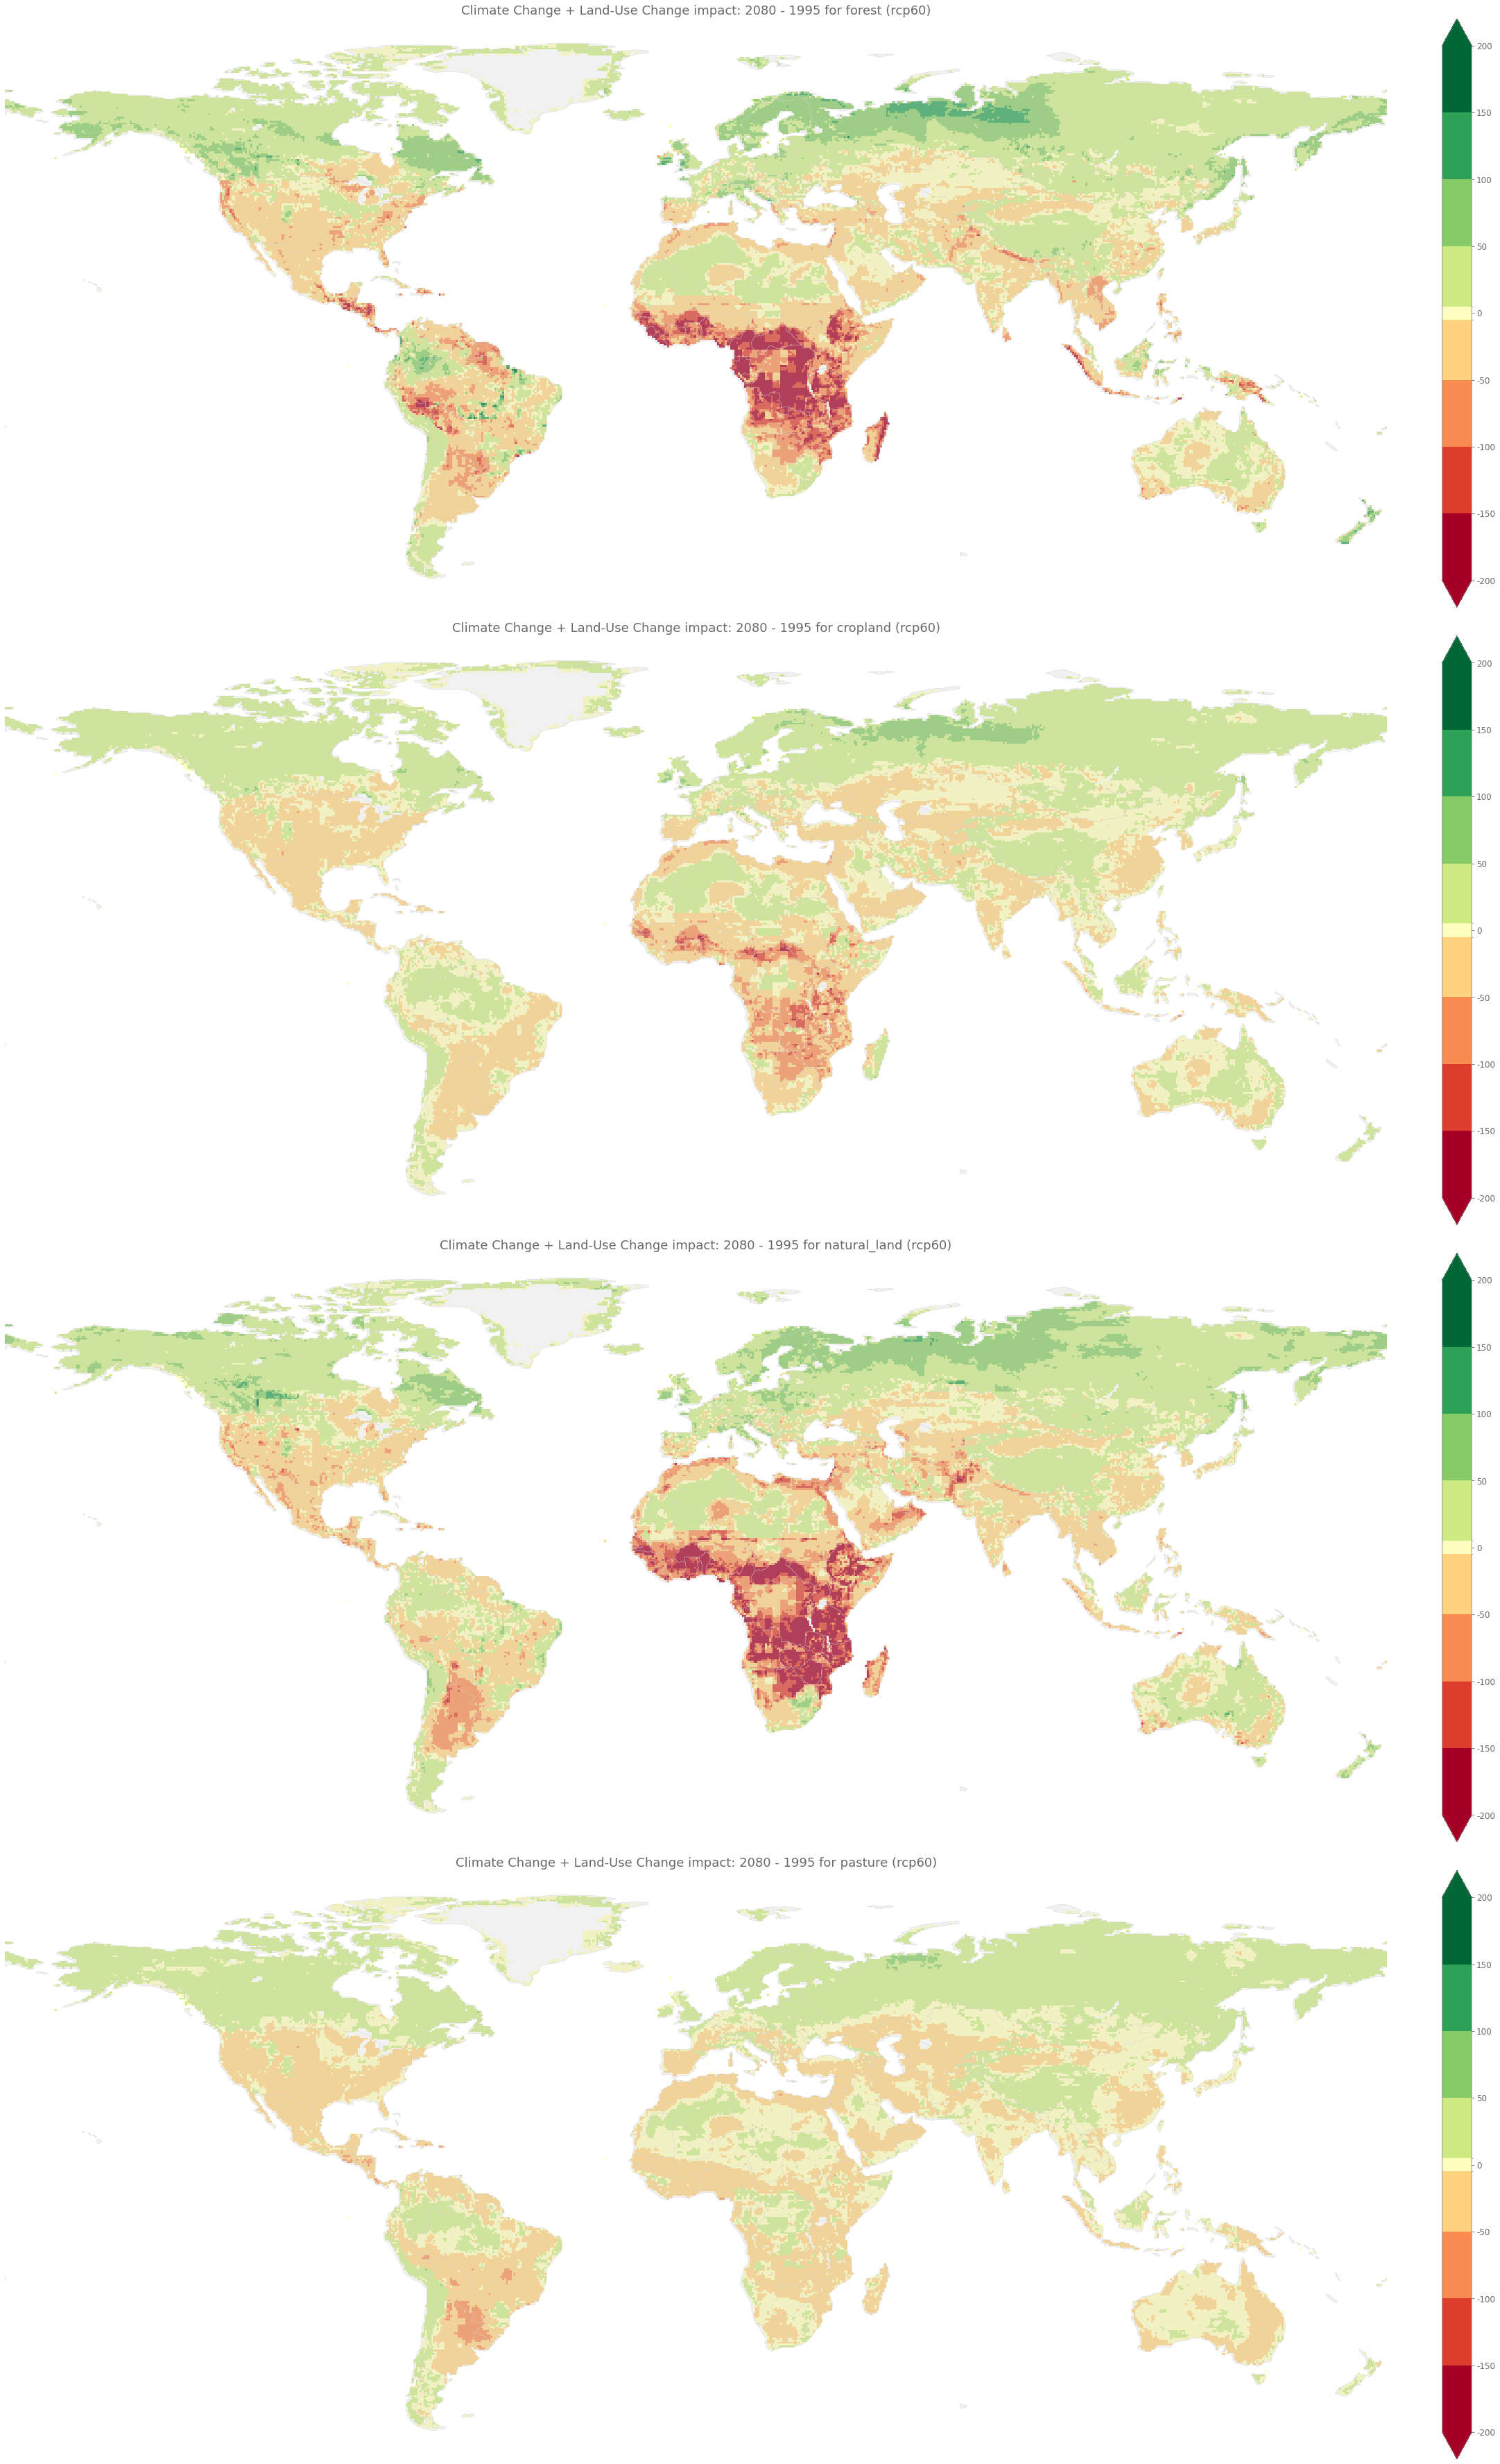

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm

warnings.filterwarnings('ignore', category=UserWarning)

models = ["GAM", "GBM"]
scenarios = ["rcp60"]

habitats = ["forest", "cropland", "natural_land", "pasture"]

fig, axes = plt.subplots(nrows=len(habitats), ncols=1, figsize=(30, 15 * len(habitats)), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = plt.get_cmap('RdYlGn')
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Create empty arrays for storing the results for each habitat separately
diff_sum_bin_combined_per_habitat = {}


for habitat in habitats:
    for scenario in scenarios:
        future_time = 65  # This seems to be a constant in your case

        # Calculate the differences for each habitat and scenario
        diff_sum_bin = mean_over_sdms_gcms_sumbin_fut[scenario][habitat] - mean_over_sdms_gcms_sumbin_hist[scenario][habitat]
        diff_sum_bin_combined_per_habitat[habitat] = diff_sum_bin
        # Store the result or perform further operations as needed

        
for row, habitat in enumerate(habitats):
    ax = axes[row]

    cmap = plt.get_cmap('RdYlGn')
    boundaries = [-200, -150, -100, -50, -5, 5, 50, 100, 150, 200]
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im = ax.pcolormesh(diff_sum_bin_combined_per_habitat[habitat]['lon'].values, diff_sum_bin_combined_per_habitat[habitat]['lat'].values,
                       np.where(diff_sum_bin_combined_per_habitat[habitat].values != 0, diff_sum_bin_combined_per_habitat[habitat].values, np.nan),
                       transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax, color="lightgray", zorder=1, alpha=0.3)
    ax.set_title(f"Climate Change + Land-Use Change impact: {year_indices[future_time]} - 1995 for {habitat} (rcp60)", loc='center')

    ax.axis('off')
    ax.coastlines(color='lightgray', linewidth=0.5)
    ax.set_extent((-180, 180, -63, 90))
    ax.add_feature(cfeature.BORDERS, color='lightgray', linewidth=0.5)

    ticks_b = np.array([-200, -150, -100, -50, 0, 50, 100, 150, 200])
    tick_labels = [str(int(tick)) for tick in ticks_b]

    cbar = plt.colorbar(im, ax=ax, fraction=0.024, pad=0.04, spacing='proportional', ticks=ticks_b, extend='both')
    cbar.set_ticklabels(tick_labels)

    
plt.show()


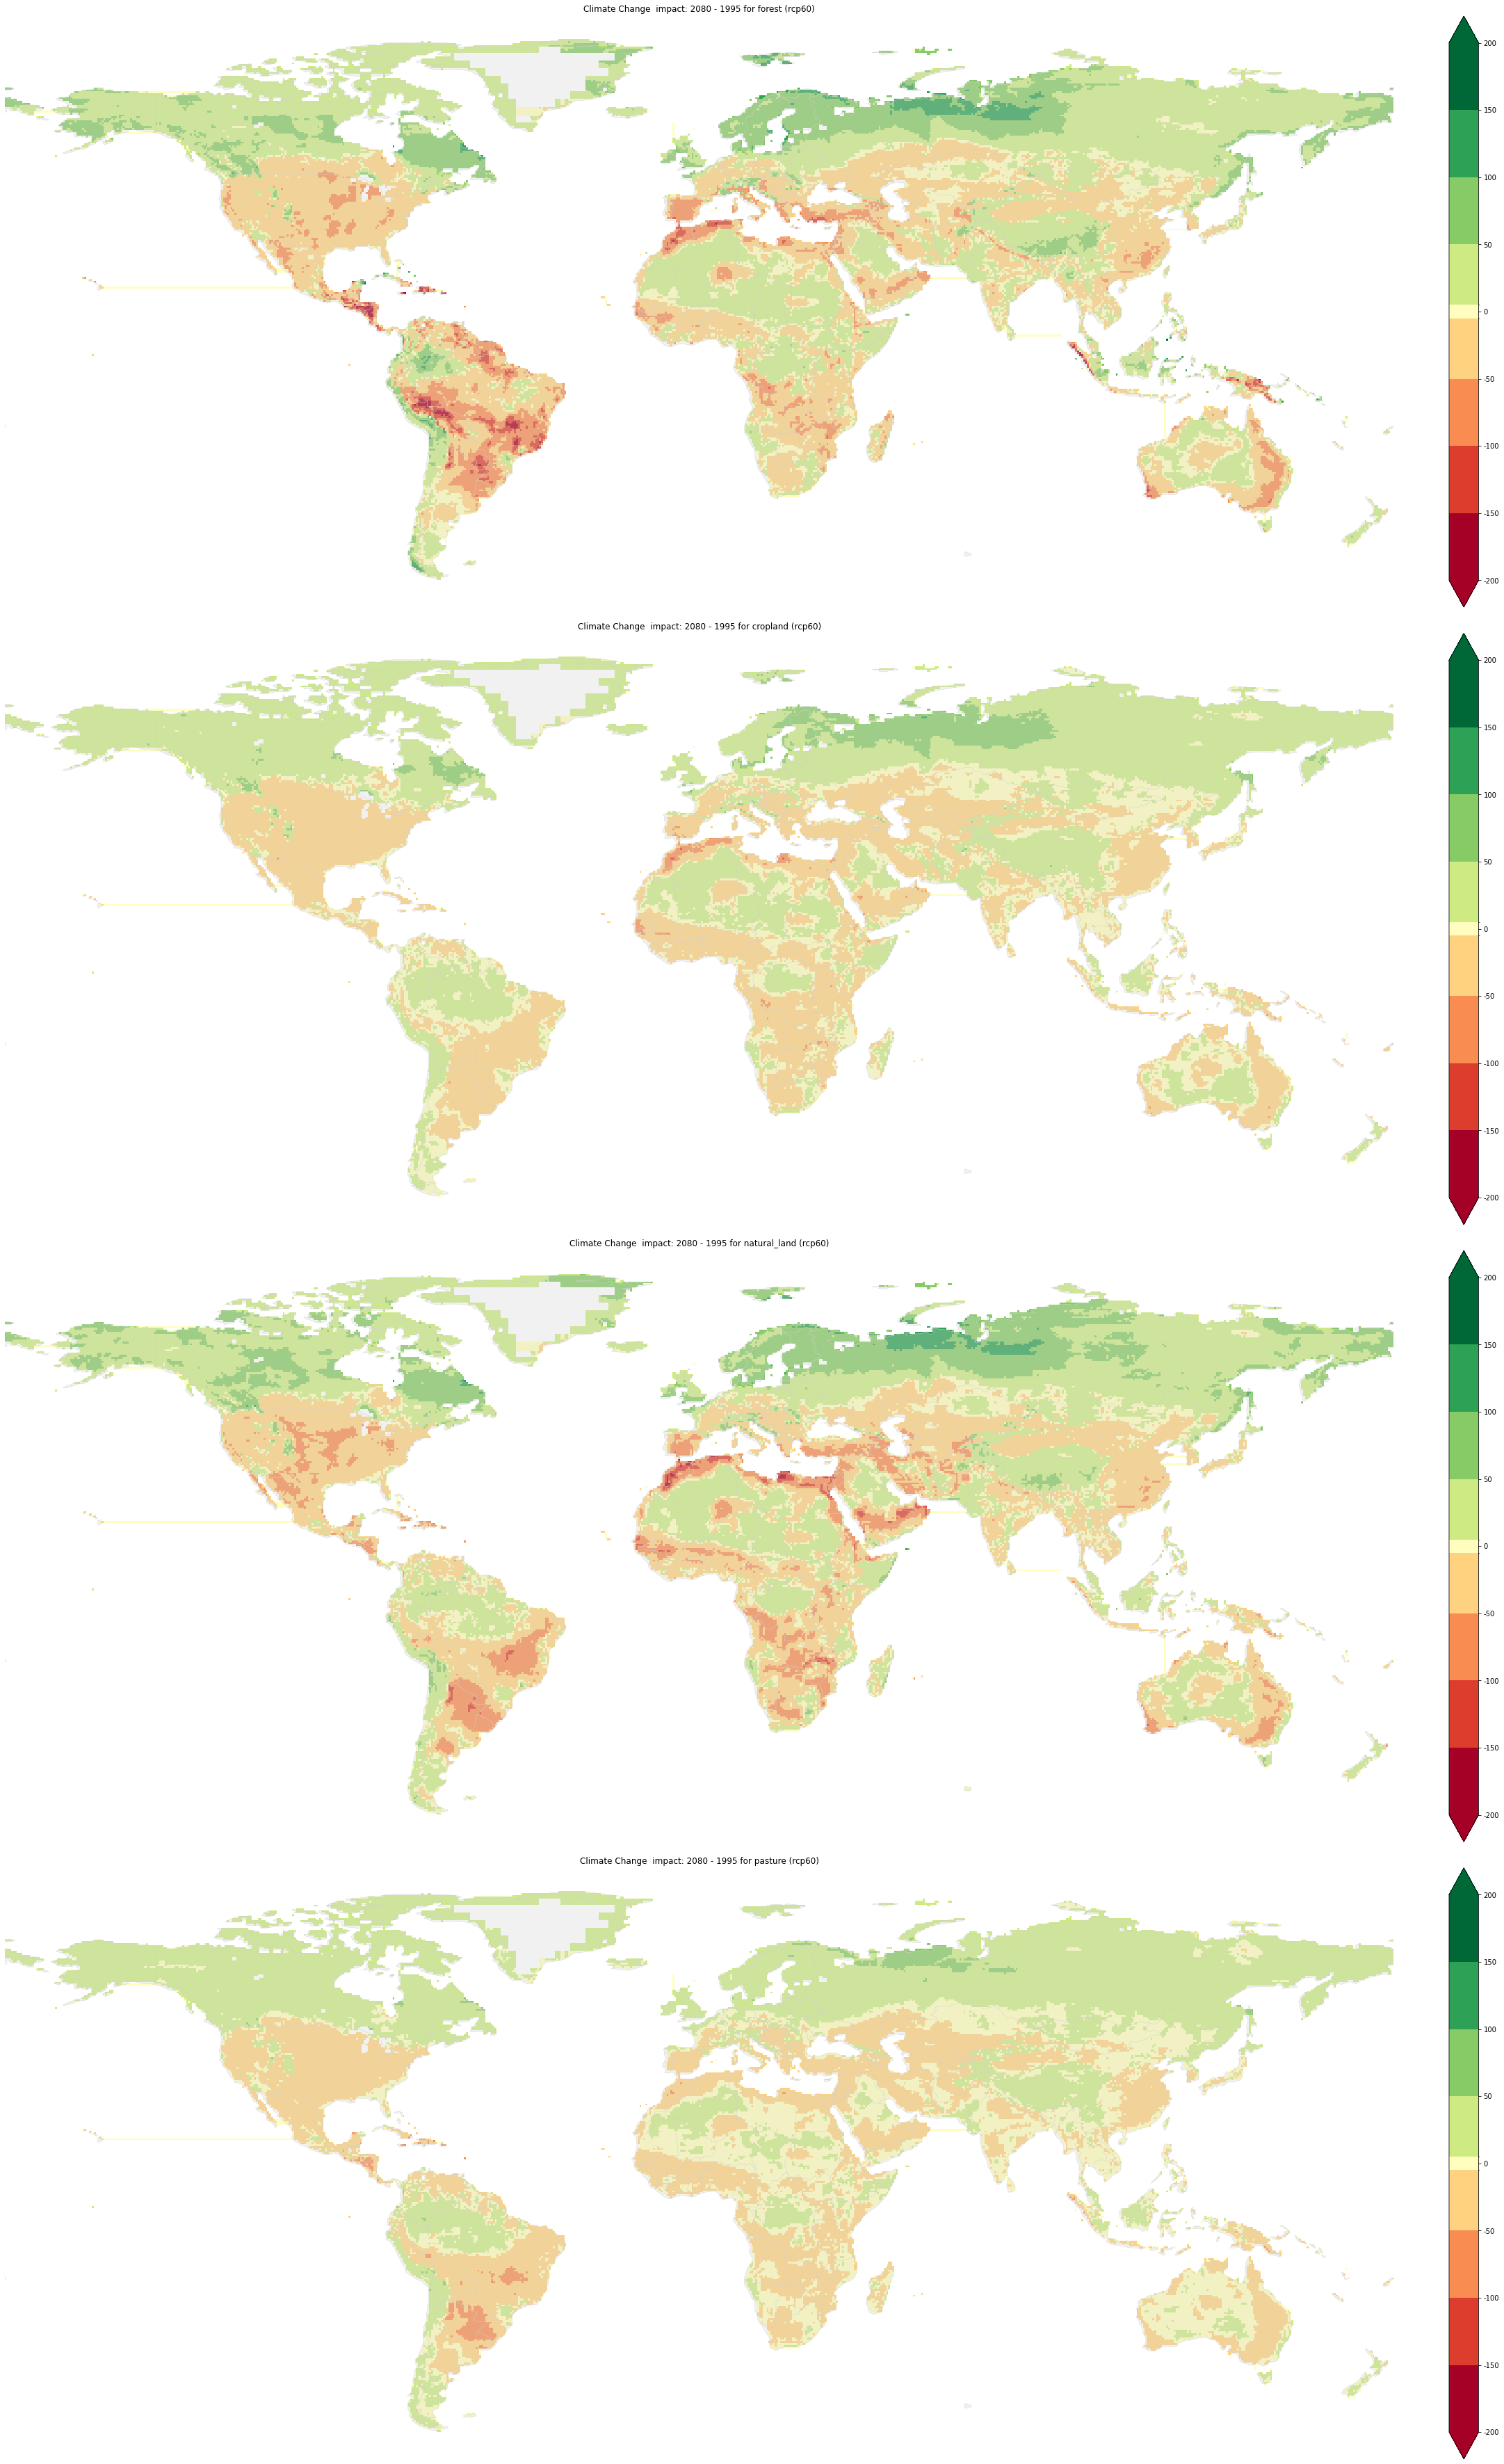

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm

warnings.filterwarnings('ignore', category=UserWarning)
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

models = ["GAM", "GBM"]
scenarios = ["rcp60"]

habitats = ["forest", "cropland", "natural_land", "pasture"]

fig, axes = plt.subplots(nrows=len(habitats), ncols=1, figsize=(30, 15 * len(habitats)), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = plt.get_cmap('RdYlGn')
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Create empty arrays for storing the results for each habitat separately
diff_sum_bin_combined_per_habitat = {}


for habitat in habitats:
    for scenario in scenarios:
        future_time = 65  # This seems to be a constant in your case

        # Calculate the differences for each habitat and scenario
        diff_sum_bin = mean_over_sdms_gcms_newvalue_fut[scenario][habitat] - mean_over_sdms_gcms_newvalue_hist[scenario][habitat]
        diff_sum_bin_combined_per_habitat[habitat] = diff_sum_bin
        # Store the result or perform further operations as needed

        
for row, habitat in enumerate(habitats):
    ax = axes[row]

    cmap = plt.get_cmap('RdYlGn')
    boundaries = [-200, -150, -100, -50, -5, 5, 50, 100, 150, 200]
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im = ax.pcolormesh(diff_sum_bin_combined_per_habitat[habitat]['lon'].values, diff_sum_bin_combined_per_habitat[habitat]['lat'].values,
                       np.where(diff_sum_bin_combined_per_habitat[habitat].values != 0, diff_sum_bin_combined_per_habitat[habitat].values, np.nan),
                       transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax, color="lightgray", zorder=1, alpha=0.3)
    ax.set_title(f"Climate Change  impact: {year_indices[future_time]} - 1995 for {habitat} (rcp60)", loc='center')

    ax.axis('off')
    ax.coastlines(color='lightgray', linewidth=0.5)
    ax.set_extent((-180, 180, -63, 90))
    ax.add_feature(cfeature.BORDERS, color='lightgray', linewidth=0.5)

    ticks_b = np.array([-200, -150, -100, -50, 0, 50, 100, 150, 200])
    tick_labels = [str(int(tick)) for tick in ticks_b]

    cbar = plt.colorbar(im, ax=ax, fraction=0.024, pad=0.04, spacing='proportional', ticks=ticks_b, extend='both')
    cbar.set_ticklabels(tick_labels)

    
plt.show()


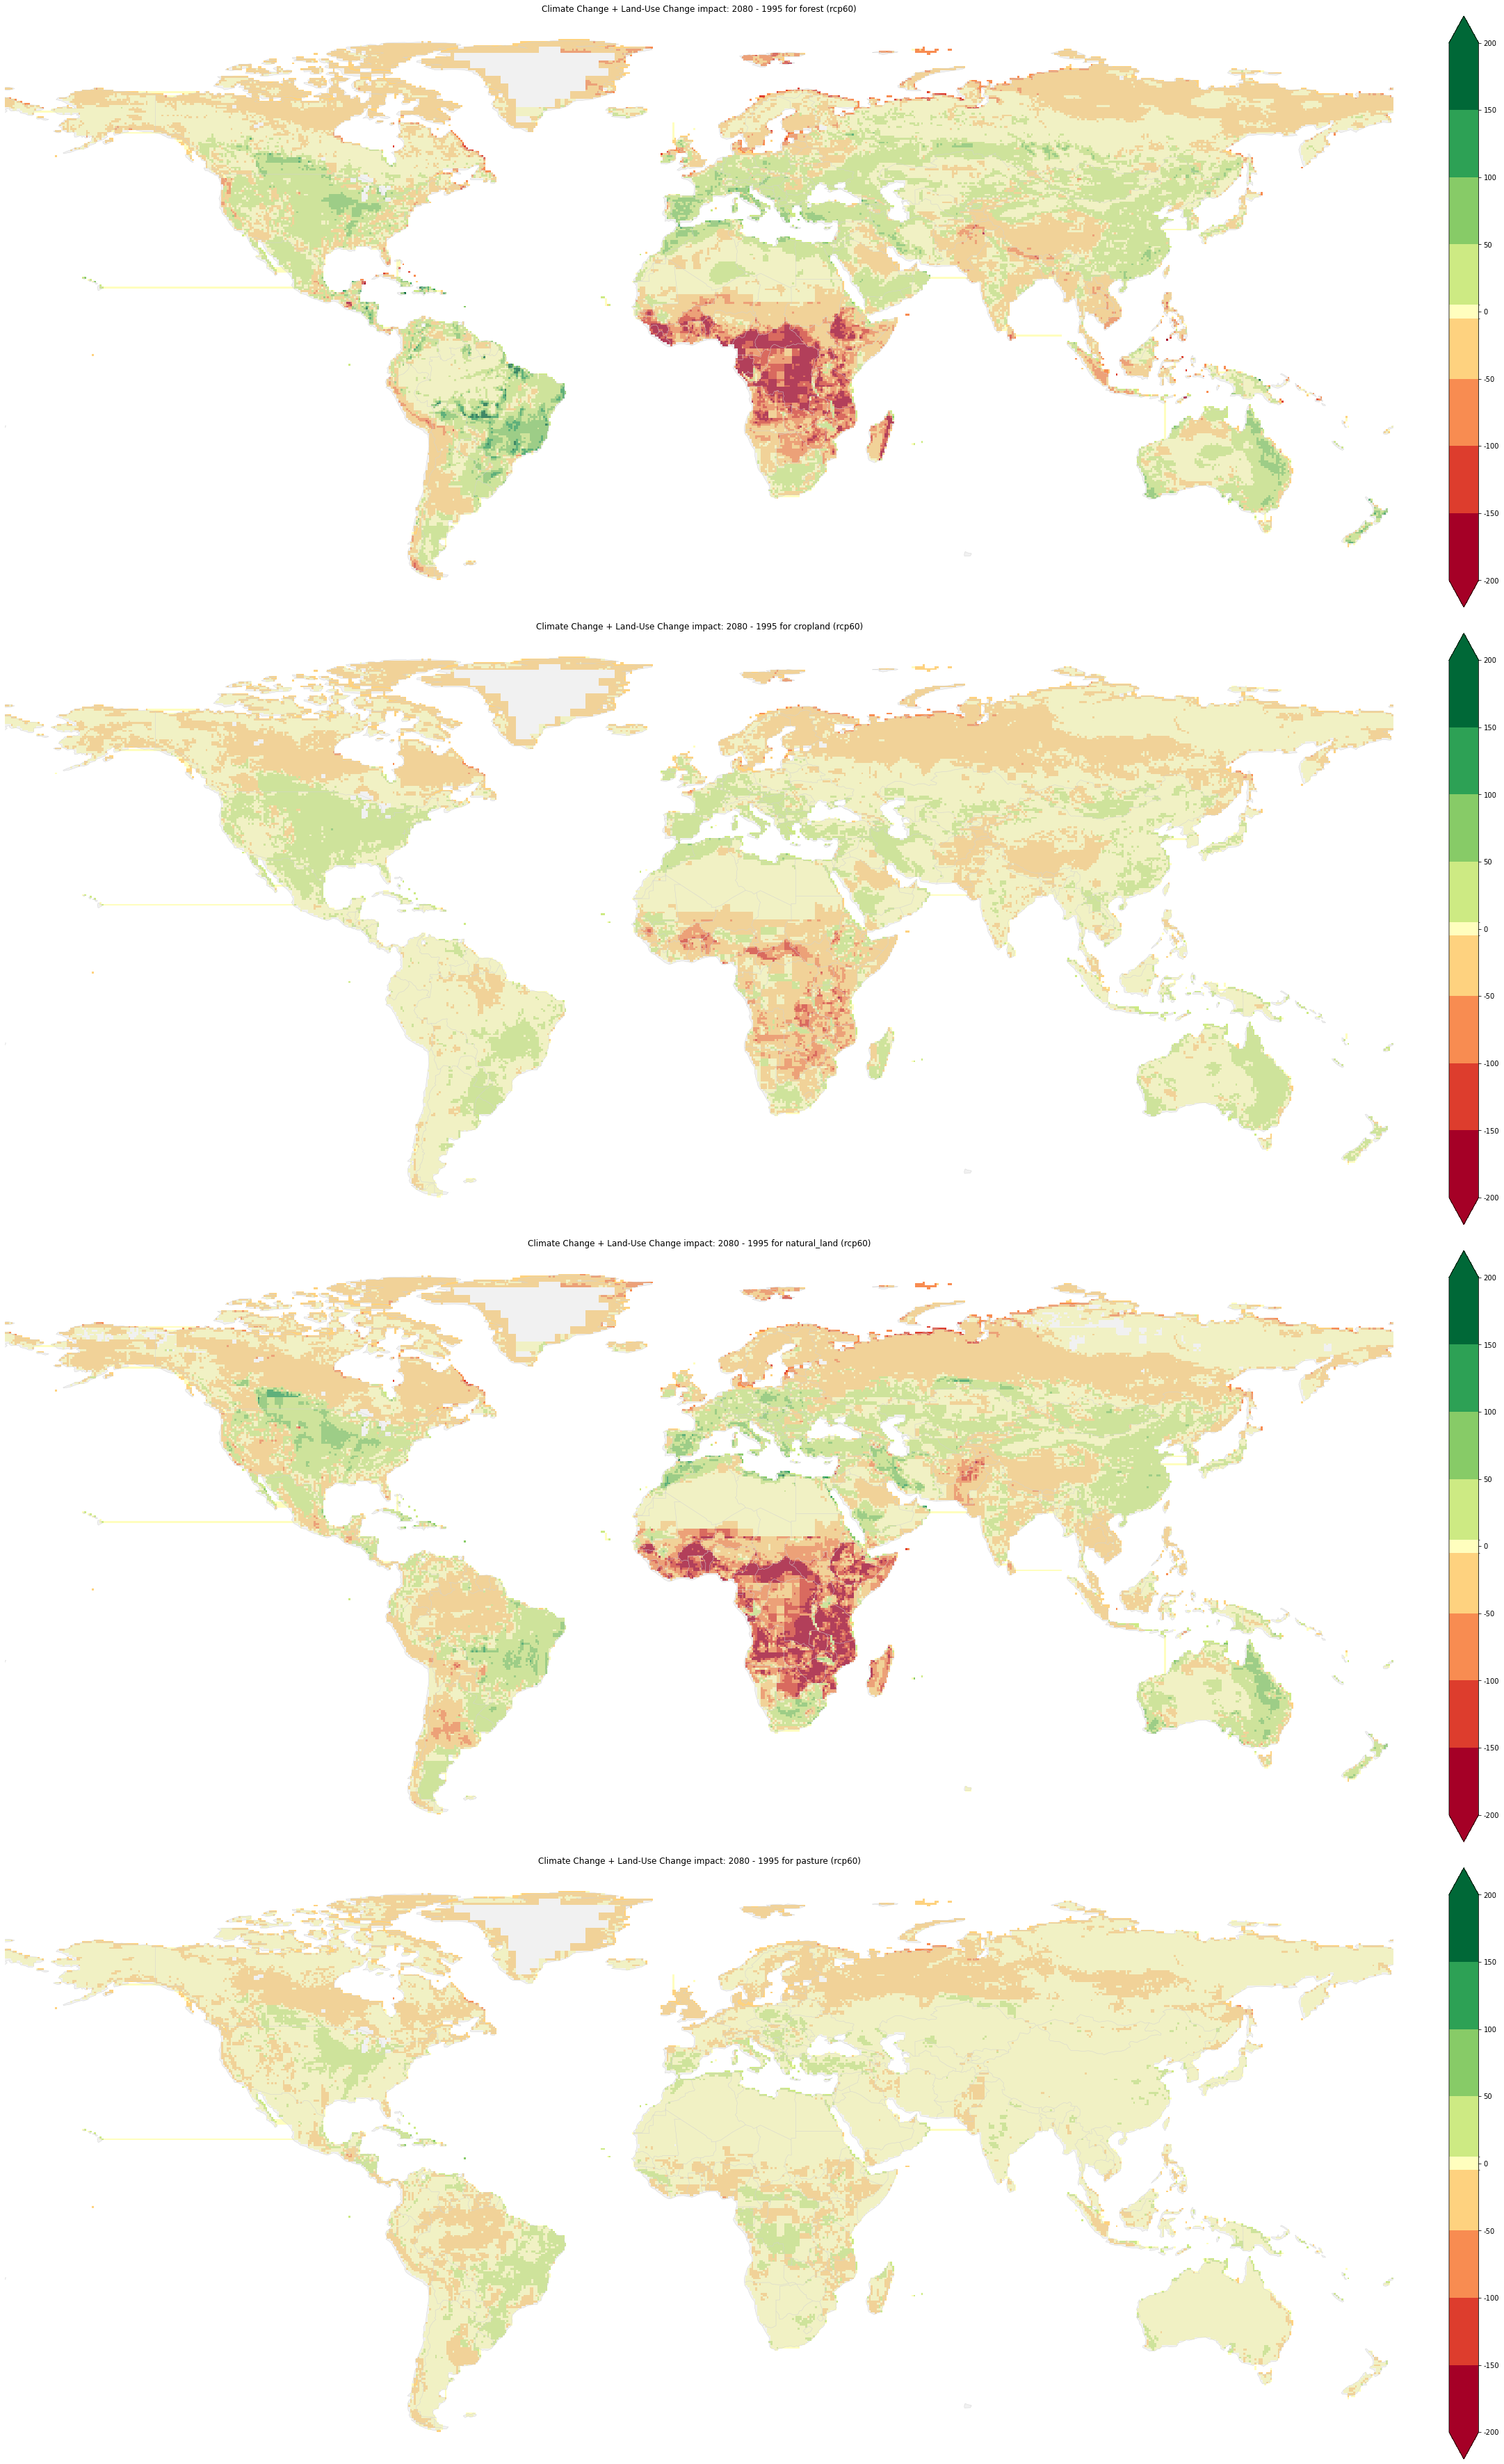

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm

warnings.filterwarnings('ignore', category=UserWarning)
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

models = ["GAM", "GBM"]
scenarios = ["rcp60"]

habitats = ["forest", "cropland", "natural_land", "pasture"]

fig, axes = plt.subplots(nrows=len(habitats), ncols=1, figsize=(30, 15 * len(habitats)), subplot_kw={'projection': ccrs.PlateCarree()}, layout="compressed")
cmap = plt.get_cmap('RdYlGn')
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Create empty arrays for storing the results for each habitat separately
diff_sum_bin_combined_per_habitat = {}


for habitat in habitats:
    for scenario in scenarios:
        future_time = 65  # This seems to be a constant in your case

        # Calculate the differences for each habitat and scenario
        diff_sum_bin =  (mean_over_sdms_gcms_sumbin_fut[scenario][habitat]- mean_over_sdms_gcms_newvalue_fut[scenario][habitat]) - (mean_over_sdms_gcms_sumbin_hist[scenario][habitat]-mean_over_sdms_gcms_newvalue_hist[scenario][habitat])
        diff_sum_bin_combined_per_habitat[habitat] = diff_sum_bin
        # Store the result or perform further operations as needed

        
for row, habitat in enumerate(habitats):
    ax = axes[row]

    cmap = plt.get_cmap('RdYlGn')
    boundaries = [-200, -150, -100, -50, -5, 5, 50, 100, 150, 200]
    norm = BoundaryNorm(boundaries, cmap.N)

    # Plot the ensemble mean difference for each panel
    im = ax.pcolormesh(diff_sum_bin_combined_per_habitat[habitat]['lon'].values, diff_sum_bin_combined_per_habitat[habitat]['lat'].values,
                       np.where(diff_sum_bin_combined_per_habitat[habitat].values != 0, diff_sum_bin_combined_per_habitat[habitat].values, np.nan),
                       transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    countries.plot(ax=ax, color="lightgray", zorder=1, alpha=0.3)
    ax.set_title(f"Climate Change + Land-Use Change impact: {year_indices[future_time]} - 1995 for {habitat} (rcp60)", loc='center')

    ax.axis('off')
    ax.coastlines(color='lightgray', linewidth=0.5)
    ax.set_extent((-180, 180, -63, 90))
    ax.add_feature(cfeature.BORDERS, color='lightgray', linewidth=0.5)

    ticks_b = np.array([-200, -150, -100, -50, 0, 50, 100, 150, 200])
    tick_labels = [str(int(tick)) for tick in ticks_b]

    cbar = plt.colorbar(im, ax=ax, fraction=0.024, pad=0.04, spacing='proportional', ticks=ticks_b, extend='both')
    cbar.set_ticklabels(tick_labels)

    
plt.show()


In [8]:
#get the IPBES sub regions
# Read the shapefile

shp_dir = "/storage/workspaces/wa_climate/climate_trt/chari/IPBES_subregions/IPBES_Regions_Subregions2.shp"
shp = gpd.read_file(shp_dir)

# Define the region mapping
region_mapping = {
    'Carribean': 'Caribbean & Mesoamerica',
    'Central Africa': 'West, Central, East & South Africa',
    'Central and Western Europe': 'Central and Western Europe',
    'Central Asia': 'Central, North-East & South Asia',
    'East Africa and adjacent islands': 'West, Central, East & South Africa',
    'Eastern Europe': 'Eastern Europe',
    'Mesoamerica': 'Caribbean & Mesoamerica',
    'North Africa': 'North Africa & Western Asia',
    'North America': 'North America',
    'Nort-East Asia': 'Central, North-East & South Asia',
    'Oceania': 'Oceania',
    'South America': 'South America',
    'South Asia': 'Central, North-East & South Asia',
    'South-East Asia': 'South-East Asia',
    'Southern Africa': 'West, Central, East & South Africa',
    'West Africa': 'West, Central, East & South Africa',
    'Western Asia': 'North Africa & Western Asia'
}

# Create the new_region column in the shapefile
shp['new_region'] = shp['Sub_Region'].map(region_mapping)

#

In [9]:
import pandas as pd

mean_species_richness_diff_dict = {'diff_newvalue': {}, 'diff_sumbin': {}}

scenarios = ["rcp26", "rcp60"]
habitats = ["forest", "cropland", "natural_land", "pasture"]  # Example habitats

# Iterate through unique new regions
for new_region in shp['new_region'].unique():
    # Select the region-specific geometry from the shapefile
    region_gdf = shp[shp['new_region'] == new_region]

    for habitat in habitats:  # Add loop for habitats
        for scenario in scenarios:
            # Calculate the absolute difference, include habitat in the calculation
            abs_diff_newvalue = mean_over_sdms_gcms_newvalue_fut[scenario][habitat] - mean_over_sdms_gcms_newvalue_hist[scenario][habitat]
            abs_diff_sumbin = mean_over_sdms_gcms_sumbin_fut[scenario][habitat] - mean_over_sdms_gcms_sumbin_hist[scenario][habitat]

            # Extract the bounding box coordinates
            minx, miny, maxx, maxy = region_gdf.geometry.total_bounds

            # Create a boolean mask based on the bounding box
            mask = (
                (abs_diff_newvalue.lon >= minx) & (abs_diff_newvalue.lon <= maxx) &
                (abs_diff_newvalue.lat >= miny) & (abs_diff_newvalue.lat <= maxy)
            )

            # Apply the mask to the DataArrays and calculate the mean species richness
            newvalue_future = mean_over_sdms_gcms_newvalue_fut[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
            newvalue_hist = mean_over_sdms_gcms_newvalue_hist[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
            sumbin_future = mean_over_sdms_gcms_sumbin_fut[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
            sumbin_hist = mean_over_sdms_gcms_sumbin_hist[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()

            # Calculate the relative difference
            rel_diff_newvalue = (newvalue_future - newvalue_hist) / newvalue_hist * 100 if newvalue_hist != 0 else 0
            rel_diff_sumbin = (sumbin_future - sumbin_hist) / sumbin_hist * 100 if sumbin_hist != 0 else 0

            # Store the relative differences
            mean_species_richness_diff_dict['diff_newvalue'].setdefault(new_region, {}).setdefault(habitat, {})[scenario] = rel_diff_newvalue
            mean_species_richness_diff_dict['diff_sumbin'].setdefault(new_region, {}).setdefault(habitat, {})[scenario] = rel_diff_sumbin

# Print the tables
for variable, region_data_dict in mean_species_richness_diff_dict.items():
    for habitat in habitats:
        print(f"\n{variable} Relative Difference in Mean Species Richness for {habitat}:")
        result_df = pd.DataFrame({region: data[habitat] for region, data in region_data_dict.items()})
        print(np.transpose(result_df))



diff_newvalue Relative Difference in Mean Species Richness for forest:
                                       rcp26     rcp60
NaN                                 0.000000  0.000000
Central, North-East & South Asia   -0.171629 -1.035547
West, Central, East & South Africa -0.379576 -2.225971
Central and Western Europe          4.020269  3.886139
North Africa & Western Asia        -2.512922 -4.273021
South America                      -2.311131 -5.471284
Eastern Europe                      7.016485  9.715854
Oceania                            -1.577508 -3.350582
Caribbean & Mesoamerica            -3.026119 -7.488958
South-East Asia                     0.267546 -0.348347
North America                       5.121272  6.597261

diff_newvalue Relative Difference in Mean Species Richness for cropland:
                                       rcp26      rcp60
NaN                                 0.000000   0.000000
Central, North-East & South Asia   -0.065341  -1.051270
West, Central, East & Sout

In [74]:
mean_over_all_sdms_gcms_fut

{'rcp26': {}}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


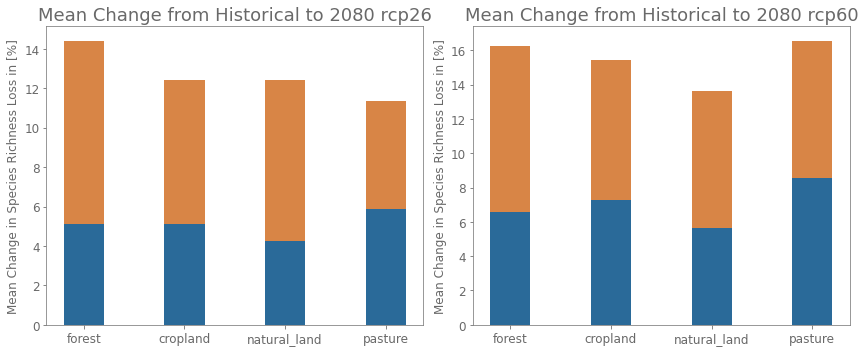

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(habitats))

# Create a variable to store the handles and labels for the legend
handles, labels = [], []

for j, scenario in enumerate(scenarios):
    ax = axes[j]
    scenario_handles, scenario_labels = [], []  # Separate lists for each scenario

    for i, habitat in enumerate(habitats):
        x_shift = x_positions[i]

        abs_diff_newvalue = mean_over_sdms_gcms_newvalue_fut[scenario][habitat] - mean_over_sdms_gcms_newvalue_hist[scenario][habitat]
        abs_diff_sumbin = mean_over_sdms_gcms_sumbin_fut[scenario][habitat] - mean_over_sdms_gcms_sumbin_hist[scenario][habitat]

        # Extract the bounding box coordinates
        minx, miny, maxx, maxy = region_gdf.geometry.total_bounds

        # Create a boolean mask based on the bounding box
        mask = (
            (abs_diff_newvalue.lon >= minx) & (abs_diff_newvalue.lon <= maxx) &
            (abs_diff_newvalue.lat >= miny) & (abs_diff_newvalue.lat <= maxy)
        )

        # Apply the mask to the DataArrays and calculate the mean species richness
        newvalue_future = mean_over_sdms_gcms_newvalue_fut[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        newvalue_hist = mean_over_sdms_gcms_newvalue_hist[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        sumbin_future = mean_over_sdms_gcms_sumbin_fut[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        sumbin_hist = mean_over_sdms_gcms_sumbin_hist[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()

        # Calculatemean_climate_changethe relative difference
        mean_climate_change = (newvalue_future - newvalue_hist) / newvalue_hist * 100 if newvalue_hist != 0 else 0
        mean_land_use_change2 = (sumbin_future - sumbin_hist) / sumbin_hist * 100 if sumbin_hist != 0 else 0

        # Store the relative differences
        mean_species_richness_diff_dict['diff_newvalue'].setdefault(new_region, {}).setdefault(habitat, {})[scenario] = rel_diff_newvalue
        mean_species_richness_diff_dict['diff_sumbin'].setdefault(new_region, {}).setdefault(habitat, {})[scenario] = rel_diff_sumbin



        ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change)
        ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change)
      #  ax.errorbar(x_shift, mean_climate_change+ mean_land_use_change2, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black')

# Extend the main lists with scenario-specific entries
    handles.extend(scenario_handles)
    labels.extend(scenario_labels)
#for ax in axes:

    # Set plot details
    ax.set_xticks(x_positions)
    ax.set_xticklabels(habitats)
    ax.set_ylabel('Mean Change in Species Richness Loss in [%]')
    ax.legend(handles=scenario_handles, labels=scenario_labels, frameon=False, loc='lower center')
    ax.set_title(f'Mean Change from Historical to {year_indices[time_ind]} {scenario}')

# Set the final legend outside the loop
#fig.legend(handles=handles, labels=labels, frameon=False, loc='lower center')

plt.tight_layout()
plt.show()

In [58]:
# Create an empty dictionary to store mean species richness for each region and each scenario
mean_species_richness_dict = {'newvalue_future': {}, 'sumbin_future': {}, 'newvalue_hist': {}, 'sumbin_hist': {}, 'diff_newvalue': {}, 'diff_sumbin': {}}

scenarios = ["rcp26","rcp60"]
historical_time= 1146
future_time=65

# Iterate through unique new regions
for new_region in shp['new_region'].unique():
    # Select the region-specific geometry from the shapefile
    region_gdf = shp[shp['new_region'] == new_region]

    for scenario in scenarios:
        diff_newvalue = mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario] 
        diff_sumbin = mean_over_all_sdms_gcms_sumbin_fut[scenario] - mean_over_all_sdms_gcms_sumbin_hist[scenario]


        # Extract the bounding box coordinates
        minx, miny, maxx, maxy = region_gdf.geometry.total_bounds

        # Create a boolean mask based on the bounding box
        mask = (
            (diff_newvalue.lon >= minx) & (diff_newvalue.lon <= maxx) &
            (diff_newvalue.lat >= miny) & (diff_newvalue.lat <= maxy)
        )

        # Apply the mask to the DataArrays
        region_data = {
            'newvalue_future': mean_over_all_sdms_gcms_fut[scenario].where(mask),
            'sumbin_future': mean_over_all_sdms_gcms_sumbin_fut[scenario].where(mask),
            'newvalue_hist': mean_over_all_sdms_gcms_hist[scenario].where(mask),
            'sumbin_hist': mean_over_all_sdms_gcms_sumbin_hist[scenario].where(mask),
            'diff_newvalue': diff_newvalue.where(mask),
            'diff_sumbin': diff_sumbin.where(mask)
        }

        # Calculate mean species richness for each variable
        for variable, data_array in region_data.items():
            mean_species_richness = data_array.sum(dim=['lat', 'lon']).item()
            mean_species_richness_dict[variable].setdefault(new_region, {})[scenario] = mean_species_richness



# Print the tables
for variable, region_data_dict in mean_species_richness_dict.items():
    print(f"\n{variable} Mean Species Richness:")
    result_df = pd.DataFrame(region_data_dict).transpose()
    print(result_df)

NameError: name 'mean_over_all_sdms_gcms_fut' is not defined

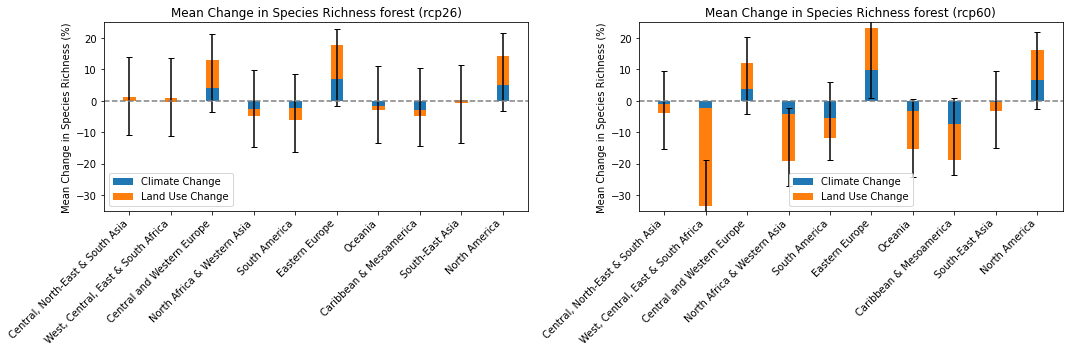

In [10]:
import numpy as np
import matplotlib.pyplot as plt
unique_regions = shp['new_region'].unique()
cleaned_regions = unique_regions[~pd.isna(unique_regions)]
habitat="forest"
# Scenarios and regions
scenarios = ["rcp26", "rcp60"]

width = 0.3  # the width of the bars


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Iterate over each scenario and plot
for i, scenario in enumerate(scenarios):
    newvalue_change_plot_data = []
    sum_bin_change_plot_data = []
    luc_change_plot_data = []
    total_change_plot_data = []
    std_dev_newvalue_list = []
    
    climate_change_per_region = []
    land_use_change_per_region = []

    for new_region in cleaned_regions:
        # Select the region-specific geometry from the shapefile
        region_gdf = shp[shp['new_region'] == new_region]

        # Calculate standard deviation for climate change for each region


        abs_diff_newvalue = mean_over_sdms_gcms_newvalue_fut[scenario][habitat] - mean_over_sdms_gcms_newvalue_hist[scenario][habitat]
        abs_diff_sumbin = mean_over_sdms_gcms_sumbin_fut[scenario][habitat] - mean_over_sdms_gcms_sumbin_hist[scenario][habitat]

        # Extract the bounding box coordinates
        minx, miny, maxx, maxy = region_gdf.geometry.total_bounds

        # Create a boolean mask based on the bounding box
        mask = (
            (abs_diff_newvalue.lon >= minx) & (abs_diff_newvalue.lon <= maxx) &
            (abs_diff_newvalue.lat >= miny) & (abs_diff_newvalue.lat <= maxy)
        )

        # Apply the mask to the DataArrays and calculate the mean species richness
        newvalue_future = mean_over_sdms_gcms_newvalue_fut[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        newvalue_hist = mean_over_sdms_gcms_newvalue_hist[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        sumbin_future = mean_over_sdms_gcms_sumbin_fut[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        sumbin_hist = mean_over_sdms_gcms_sumbin_hist[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        


        # Calculatemean_climate_changethe relative difference
        mean_climate_change = (newvalue_future - newvalue_hist) / newvalue_hist * 100 if newvalue_hist != 0 else 0
        mean_land_use_change2 = (sumbin_future - sumbin_hist) / sumbin_hist * 100 if sumbin_hist != 0 else 0

        # Store the relative differences
        mean_species_richness_diff_dict['diff_newvalue'].setdefault(new_region, {}).setdefault(habitat, {})[scenario] = rel_diff_newvalue
        mean_species_richness_diff_dict['diff_sumbin'].setdefault(new_region, {}).setdefault(habitat, {})[scenario] = rel_diff_sumbin

        # Calculate land use change for each region and append to list
        
        std_dev_climate_change = np.std([np.mean(hist[scenario][habitat][sdm][gcm]) for sdm in sdms for gcm in gcms])
        luc_change = mean_land_use_change2 - mean_climate_change
        luc_change_plot_data.append(luc_change)
        
        total_change = mean_land_use_change2
        total_change_plot_data.append(total_change)
        
        climate_change_per_region.append(mean_climate_change)
        land_use_change_per_region.append(mean_land_use_change2)

    # Plotting
    x = np.arange(len(climate_change_per_region))  # Adjusted for the number of regions
    axes[i].bar(x , climate_change_per_region, width, label='Climate Change')
    axes[i].bar(x , land_use_change_per_region,width, bottom=climate_change_per_region , label='Land Use Change')
    axes[i].errorbar(x, land_use_change_per_region, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black')
    


#axes[i].bar(x, luc_change_plot_data , width, bottom= newvalue_change_plot_data,label='Land Use Change')


    # Add some text for labels, title, and custom x-axis tick labels
    
    axes[i].set_ylim([-35, 25])
    axes[i].axhline(y=0, color='gray', linestyle='--')
    axes[i].set_ylabel('Mean Change in Species Richness (%)')
    axes[i].set_title(f'Mean Change in Species Richness {habitat} ({scenario})')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(cleaned_regions, rotation=45, ha='right')
    axes[i].legend()

# Adjust layout
fig.tight_layout()

plt.show()


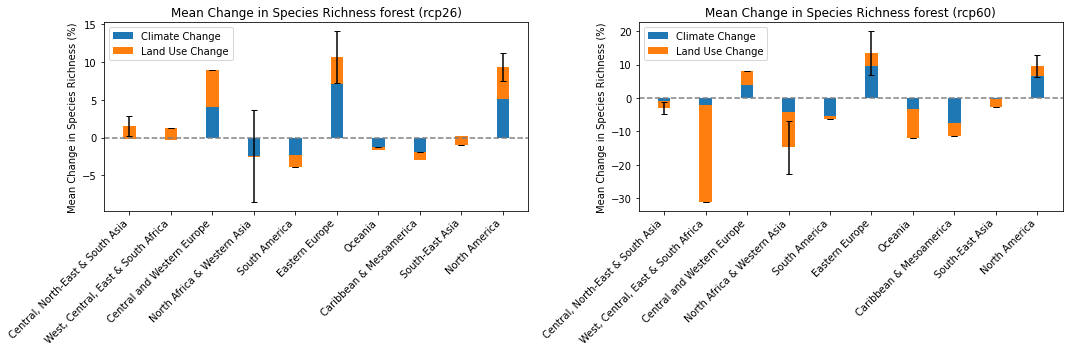

In [79]:
#incorporate Std 
import numpy as np
import matplotlib.pyplot as plt
unique_regions = shp['new_region'].unique()
cleaned_regions = unique_regions[~pd.isna(unique_regions)]


habitat="forest"
# Scenarios and regions
scenarios = ["rcp26", "rcp60"]

width = 0.3  # the width of the bars


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Iterate over each scenario and plot
for i, scenario in enumerate(scenarios):
    newvalue_change_plot_data = []
    sum_bin_change_plot_data = []
    luc_change_plot_data = []
    total_change_plot_data = []
    std_dev_newvalue_list = []
    
    climate_change_per_region = []
    land_use_change_per_region = []
    std_dev_per_region = []

    for new_region in cleaned_regions:
        # Select the region-specific geometry from the shapefile
        region_gdf = shp[shp['new_region'] == new_region]

        abs_diff_newvalue = mean_over_sdms_gcms_newvalue_fut[scenario][habitat] - mean_over_sdms_gcms_newvalue_hist[scenario][habitat]
        abs_diff_sumbin = mean_over_sdms_gcms_sumbin_fut[scenario][habitat] - mean_over_sdms_gcms_sumbin_hist[scenario][habitat]

        # Extract the bounding box coordinates
        minx, miny, maxx, maxy = region_gdf.geometry.total_bounds

        # Create a boolean mask based on the bounding box
        mask = (
            (abs_diff_newvalue.lon >= minx) & (abs_diff_newvalue.lon <= maxx) &
            (abs_diff_newvalue.lat >= miny) & (abs_diff_newvalue.lat <= maxy)
        )

        # Calculate standard deviation for climate change for each region
        region_hist_data = []
        for sdm in sdms:
            for gcm in gcms:
                # Retrieve historical and future data with the applied mask
                hist_data = hist[scenario][habitat][sdm][gcm].where(mask, drop=True)
                fut_data = hist_fut[scenario][habitat][sdm][gcm].where(mask, drop=True)

                # Ensure that the historical data is not zero to avoid division by zero
                non_zero_hist_data = hist_data != 0

                # Calculate the relative difference safely
                regional_rel_diff = np.where(non_zero_hist_data, (fut_data - hist_data) / hist_data * 100, 0)


        cleaned_region_hist_data = remove_outliers(np.array(regional_rel_diff))


        std_dev_climate_change = np.std(cleaned_region_hist_data)
        std_dev_per_region.append(std_dev_climate_change)


        # Apply the mask to the DataArrays and calculate the mean species richness
        newvalue_future = mean_over_sdms_gcms_newvalue_fut[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        newvalue_hist = mean_over_sdms_gcms_newvalue_hist[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        sumbin_future = mean_over_sdms_gcms_sumbin_fut[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        sumbin_hist = mean_over_sdms_gcms_sumbin_hist[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        
        masked_hist= (hist[scenario][habitat][sdm][gcm].where(mask) for sdm in sdms for gcm in gcms)

        # Calculatemean_climate_changethe relative difference
        mean_climate_change = (newvalue_future - newvalue_hist) / newvalue_hist * 100 if newvalue_hist != 0 else 0
        mean_land_use_change2 = (sumbin_future - sumbin_hist) / sumbin_hist * 100 if sumbin_hist != 0 else 0

        # Store the relative differences
        mean_species_richness_diff_dict['diff_newvalue'].setdefault(new_region, {}).setdefault(habitat, {})[scenario] = rel_diff_newvalue
        mean_species_richness_diff_dict['diff_sumbin'].setdefault(new_region, {}).setdefault(habitat, {})[scenario] = rel_diff_sumbin

        # Calculate land use change for each region and append to list
        
        luc_change = mean_land_use_change2 - mean_climate_change
        luc_change_plot_data.append(luc_change)
        
        total_change = mean_land_use_change2
        total_change_plot_data.append(total_change)
        
        climate_change_per_region.append(mean_climate_change)
        land_use_change_per_region.append(mean_land_use_change2)

    # Plotting
    x = np.arange(len(climate_change_per_region))  # Adjusted for the number of regions
    axes[i].bar(x , climate_change_per_region, width, label='Climate Change')
    axes[i].bar(x , luc_change_plot_data,width, bottom=climate_change_per_region , label='Land Use Change')
    axes[i].errorbar(x, land_use_change_per_region, yerr=std_dev_per_region, fmt='none', capsize=3, color='black')
    


#axes[i].bar(x, luc_change_plot_data , width, bottom= newvalue_change_plot_data,label='Land Use Change')


    # Add some text for labels, title, and custom x-axis tick labels
    
   
    axes[i].axhline(y=0, color='gray', linestyle='--')
    axes[i].set_ylabel('Mean Change in Species Richness (%)')
    axes[i].set_title(f'Mean Change in Species Richness {habitat} ({scenario})')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(cleaned_regions, rotation=45, ha='right')
    axes[i].legend()

# Adjust layout
fig.tight_layout()

plt.show()


In [78]:
newvalue_hist

10155014.116096241

In [76]:
st

NameError: name 'st' is not defined

In [108]:
shp['new_region'].unique()

array([nan, 'Central, North-East & South Asia',
       'West, Central, East & South Africa', 'Central and Western Europe',
       'North Africa & Western Asia', 'South America', 'Eastern Europe',
       'Oceania', 'Caribbean & Mesoamerica', 'South-East Asia',
       'North America'], dtype=object)

In [8]:
# Create an empty dictionary to store mean species richness for each region and each scenario
mean_species_richness_dict = {'newvalue_future': {}, 'sumbin_future': {}, 'newvalue_hist': {}, 'sumbin_hist': {}, 'diff_newvalue': {}, 'diff_sumbin': {}}

scenarios = ["rcp26","rcp60"]
historical_time= 1146
future_time=65

# Iterate through unique new regions
for new_region in shp['new_region'].unique():
    # Select the region-specific geometry from the shapefile
    region_gdf = shp[shp['new_region'] == new_region]

    for scenario in scenarios:
        diff_newvalue = mean_over_all_sdms_gcms_fut[scenario] - mean_over_all_sdms_gcms_hist[scenario] 
        diff_sumbin = mean_over_all_sdms_gcms_sumbin_fut[scenario] - mean_over_all_sdms_gcms_sumbin_hist[scenario]


        # Extract the bounding box coordinates
        minx, miny, maxx, maxy = region_gdf.geometry.total_bounds

        # Create a boolean mask based on the bounding box
        mask = (
            (diff_newvalue.lon >= minx) & (diff_newvalue.lon <= maxx) &
            (diff_newvalue.lat >= miny) & (diff_newvalue.lat <= maxy)
        )

        # Apply the mask to the DataArrays
        region_data = {
            'newvalue_future': mean_over_all_sdms_gcms_fut[scenario].where(mask),
            'sumbin_future': mean_over_all_sdms_gcms_sumbin_fut[scenario].where(mask),
            'newvalue_hist': mean_over_all_sdms_gcms_hist[scenario].where(mask),
            'sumbin_hist': mean_over_all_sdms_gcms_sumbin_hist[scenario].where(mask),
            'diff_newvalue': diff_newvalue.where(mask),
            'diff_sumbin': diff_sumbin.where(mask)
        }

        # Calculate mean species richness for each variable
        for variable, data_array in region_data.items():
            mean_species_richness = data_array.sum(dim=['lat', 'lon']).item()
            mean_species_richness_dict[variable].setdefault(new_region, {})[scenario] = mean_species_richness



# Print the tables
for variable, region_data_dict in mean_species_richness_dict.items():
    print(f"\n{variable} Mean Species Richness:")
    result_df = pd.DataFrame(region_data_dict).transpose()
    print(result_df)


newvalue_future Mean Species Richness:
                                           rcp26         rcp60
NaN                                 0.000000e+00  0.000000e+00
Central, North-East & South Asia    1.950518e+06  1.933638e+06
West, Central, East & South Africa  3.086412e+06  3.029207e+06
Central and Western Europe          2.345911e+06  2.342886e+06
North Africa & Western Asia         1.489707e+06  1.462811e+06
South America                       3.727670e+06  3.607083e+06
Eastern Europe                      8.356678e+06  8.567466e+06
Oceania                             9.515876e+06  9.344448e+06
Caribbean & Mesoamerica             5.659241e+05  5.398797e+05
South-East Asia                     1.188614e+06  1.181313e+06
North America                       1.067508e+07  1.082497e+07

sumbin_future Mean Species Richness:
                                           rcp26         rcp60
NaN                                 0.000000e+00  0.000000e+00
Central, North-East & South Asia    1.14

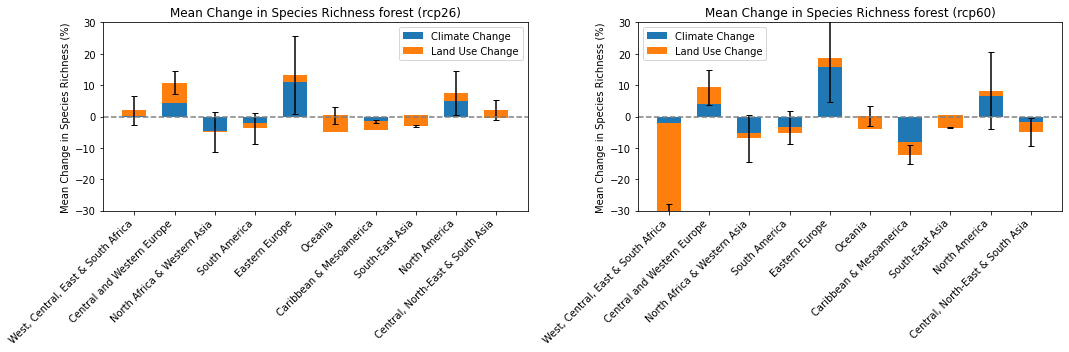

In [10]:
#all together 

import os
import pickle
import xarray as xr
# Specify the output directory, habitats, scenarios, SDMs, and GCMs
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/habitats/"
habitats = ["forest", "cropland", "natural_land", "pasture"]

regionlist = ['West, Central, East & South Africa', 'Central and Western Europe', 'North Africa & Western Asia', 'South America', 'Eastern Europe', 'Oceania', 'Caribbean & Mesoamerica', 'South-East Asia', 'North America', 'Central, North-East & South Asia']

scenarios = ["rcp26", "rcp60"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
time = '65'
# Other initializations remain the same

# Dictionaries for storing the mean values over GCMs
mean_over_gcms_newvalue_hist = {}
mean_over_gcms_newvalue_fut = {}
mean_over_gcms_sumbin_hist = {}
mean_over_gcms_sumbin_fut = {}

# Dictionaries for storing the final mean values over SDMs and GCMs
mean_over_sdms_gcms_newvalue_hist = {}
mean_over_sdms_gcms_newvalue_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

hist= {}
hist_fut= {}

for scenario in scenarios:
    # Initialize dictionaries for each scenario and habitat
    mean_over_gcms_newvalue_hist[scenario] = {}
    mean_over_gcms_newvalue_fut[scenario] = {}
    mean_over_gcms_sumbin_hist[scenario] = {}
    mean_over_gcms_sumbin_fut[scenario] = {}

    mean_over_sdms_gcms_newvalue_hist[scenario] = {}
    mean_over_sdms_gcms_newvalue_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    hist[scenario] = {}
    hist_fut[scenario] = {}
    for habitat in habitats:
        mean_over_gcms_newvalue_hist[scenario][habitat] = []
        mean_over_gcms_newvalue_fut[scenario][habitat] = []
        mean_over_gcms_sumbin_hist[scenario][habitat] = []
        mean_over_gcms_sumbin_fut[scenario][habitat] = []
        hist[scenario][habitat] = {}
        hist_fut[scenario][habitat] = {}
        for sdm in sdms:
            # Temporary lists to store data for each GCM
            temp_hist = []
            temp_fut = []
            temp_sumbin_hist = []
            temp_sumbin_fut = []
            
            hist[scenario][habitat][sdm] = {}
            hist_fut[scenario][habitat][sdm] = {}

            for gcm in gcms:
                # Load pickle files for each habitat
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{habitat}_['{scenario}']_['{time}'].pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{habitat}_['{scenario}']_['{time}'].pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{habitat}_['{scenario}']_['{time}'].pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{habitat}_['{scenario}']_['{time}'].pkl")
                
                
                with open(newvalue_hist_sum_path, "rb") as f:
                    temp_hist.append(pickle.load(f))
                with open(newvalue_future_sum_path, "rb") as f:
                    temp_fut.append(pickle.load(f))
                with open(sum_bin_hist_sum_path, "rb") as f:
                    temp_sumbin_hist.append(pickle.load(f))
                with open(sum_bin_future_sum_path, "rb") as f:
                    temp_sumbin_fut.append(pickle.load(f))
                    
                with open(newvalue_future_sum_path, "rb") as f:
                    hist_data = pickle.load(f)
                hist_fut[scenario][habitat][sdm][gcm] = hist_data 
                
                with open(newvalue_hist_sum_path, "rb") as f:
                    hist_data = pickle.load(f)
                hist[scenario][habitat][sdm][gcm]= hist_data
                

            # Calculate the mean over GCMs and append to the list
            mean_over_gcms_newvalue_hist[scenario][habitat].append(xr.concat(temp_hist, dim='gcm').mean(dim='gcm'))
            mean_over_gcms_newvalue_fut[scenario][habitat].append(xr.concat(temp_fut, dim='gcm').mean(dim='gcm'))
            mean_over_gcms_sumbin_hist[scenario][habitat].append(xr.concat(temp_sumbin_hist, dim='gcm').mean(dim='gcm'))
            mean_over_gcms_sumbin_fut[scenario][habitat].append(xr.concat(temp_sumbin_fut, dim='gcm').mean(dim='gcm'))

        # Calculate the mean over SDMs
        mean_over_sdms_gcms_newvalue_hist[scenario][habitat] = xr.concat(mean_over_gcms_newvalue_hist[scenario][habitat], dim='sdm').mean(dim='sdm')
        mean_over_sdms_gcms_newvalue_fut[scenario][habitat] = xr.concat(mean_over_gcms_newvalue_fut[scenario][habitat], dim='sdm').mean(dim='sdm')
        mean_over_sdms_gcms_sumbin_hist[scenario][habitat] = xr.concat(mean_over_gcms_sumbin_hist[scenario][habitat], dim='sdm').mean(dim='sdm')
        mean_over_sdms_gcms_sumbin_fut[scenario][habitat] = xr.concat(mean_over_gcms_sumbin_fut[scenario][habitat], dim='sdm').mean(dim='sdm')
        
        
#incorporate Std 
import numpy as np
import matplotlib.pyplot as plt

habitat="forest"
# Scenarios and regions
scenarios = ["rcp26", "rcp60"]

width = 0.3  # the width of the bars

def remove_outliers(data):
    Q1 = np.nanpercentile(data, 25)
    Q3 = np.nanpercentile(data, 75)
    IQR = Q3 - Q1
    return data[(data >= Q1 - 1.5 * IQR) & (data <= Q3 + 1.5 * IQR)]
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
mean_species_richness_diff_dict = {'diff_newvalue': {}, 'diff_sumbin': {}}

# Iterate over each scenario and plot
for i, scenario in enumerate(scenarios):
    newvalue_change_plot_data = []
    sum_bin_change_plot_data = []
    luc_change_plot_data = []
    total_change_plot_data = []
    std_dev_newvalue_list = []
    
    climate_change_per_region = []
    land_use_change_per_region = []
    std_dev_per_region = []

    for region in regionlist:
        # Open the NetCDF file with the mask for the current region
        oceanic = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/IPBES_subregions/output_{region}_data.nc", decode_times=False)
        oceania_mask_renamed = oceanic.rename({'longitude': 'lon', 'latitude': 'lat'})[f"{region}_data"]
        sumbin_future = xr.open_dataset(f"/storage/scratch/users/ch21o450/data/SR/GAM_65_rcp26_summedprobs_sum_forest.nc", decode_times=False).to_array().isel(variable=0)
        mask = oceania_mask_renamed.interp(lat=sumbin_future['lat'], lon=sumbin_future['lon'], method='nearest')


        # Calculate standard deviation for climate change for each region
        region_hist_data = []
        for sdm in sdms:
            for gcm in gcms:
                # Retrieve historical and future data with the applied mask
                hist_data = hist[scenario][habitat][sdm][gcm].where(mask, drop=True)
                fut_data = hist_fut[scenario][habitat][sdm][gcm].where(mask, drop=True)

                # Ensure that the historical data is not zero to avoid division by zero
                non_zero_hist_data = hist_data != 0

                # Calculate the relative difference safely
                regional_rel_diff = np.where(non_zero_hist_data, (fut_data - hist_data) / hist_data * 100, 0)

 
        # Remove outliers from the historical data
        cleaned_region_hist_data = remove_outliers(np.array(regional_rel_diff))

        # Calculate standard deviation for the region if data is available
        if cleaned_region_hist_data.size > 0:
            std_dev_climate_change = np.std(cleaned_region_hist_data)
            std_dev_per_region.append(std_dev_climate_change)
        else:
            std_dev_per_region.append(0)  # Append zero or NaN if no data


        abs_diff_newvalue = mean_over_sdms_gcms_newvalue_fut[scenario][habitat] - mean_over_sdms_gcms_newvalue_hist[scenario][habitat]
        abs_diff_sumbin = mean_over_sdms_gcms_sumbin_fut[scenario][habitat] - mean_over_sdms_gcms_sumbin_hist[scenario][habitat]


        # Apply the mask to the DataArrays and calculate the mean species richness
        newvalue_future = mean_over_sdms_gcms_newvalue_fut[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        newvalue_hist = mean_over_sdms_gcms_newvalue_hist[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        sumbin_future = mean_over_sdms_gcms_sumbin_fut[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        sumbin_hist = mean_over_sdms_gcms_sumbin_hist[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        


        # Calculatemean_climate_changethe relative difference
        mean_climate_change = (newvalue_future - newvalue_hist) / newvalue_hist * 100 if newvalue_hist != 0 else 0
        mean_land_use_change2 = (sumbin_future - sumbin_hist) / sumbin_hist * 100 if sumbin_hist != 0 else 0

        # Store the relative differences
        mean_species_richness_diff_dict['diff_newvalue'].setdefault(new_region, {}).setdefault(habitat, {})[scenario] = mean_climate_change
        mean_species_richness_diff_dict['diff_sumbin'].setdefault(new_region, {}).setdefault(habitat, {})[scenario] = mean_land_use_change2

        # Calculate land use change for each region and append to list
        
        luc_change = mean_land_use_change2 - mean_climate_change
        luc_change_plot_data.append(luc_change)
        
        total_change = mean_land_use_change2
        total_change_plot_data.append(total_change)
        
        climate_change_per_region.append(mean_climate_change)
        land_use_change_per_region.append(mean_land_use_change2)

    # Plotting
    x = np.arange(len(climate_change_per_region)) /2 # Adjusted for the number of regions
    axes[i].bar(x , climate_change_per_region, width, label='Climate Change')
    axes[i].bar(x , luc_change_plot_data,width, bottom=climate_change_per_region , label='Land Use Change')
    axes[i].errorbar(x, total_change_plot_data, yerr=std_dev_per_region, fmt='none', capsize=3, color='black')
    


#axes[i].bar(x, luc_change_plot_data , width, bottom= newvalue_change_plot_data,label='Land Use Change')


    # Add some text for labels, title, and custom x-axis tick labels
    
    axes[i].set_ylim([-30, 30])
    axes[i].axhline(y=0, color='gray', linestyle='--')
    axes[i].set_ylabel('Mean Change in Species Richness (%)')
    axes[i].set_title(f'Mean Change in Species Richness {habitat} ({scenario})')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(regionlist, rotation=45, ha='right')
    axes[i].legend()

# Adjust layout
fig.tight_layout()

plt.show()


In [93]:
std_dev_climate_change

3.3811320655001227

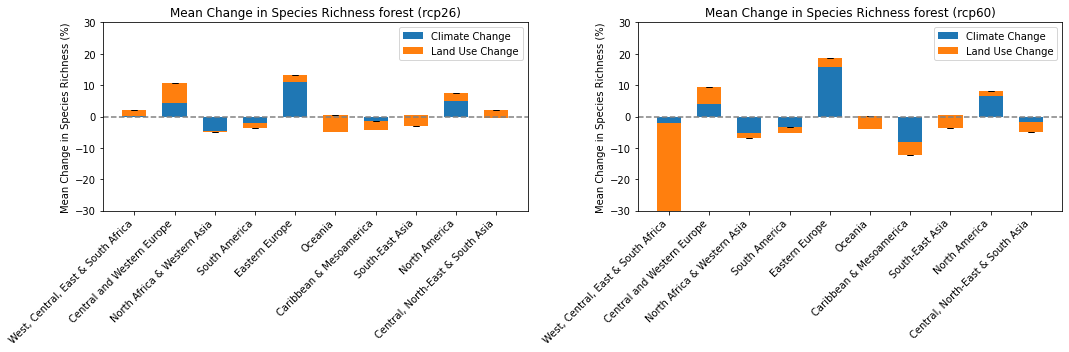

In [ ]:
#all together 

import os
import pickle
import xarray as xr
# Specify the output directory, habitats, scenarios, SDMs, and GCMs
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/habitats/"
habitats = ["forest", "cropland", "natural_land", "pasture"]

regionlist = ['West, Central, East & South Africa', 'Central and Western Europe', 'North Africa & Western Asia', 'South America', 'Eastern Europe', 'Oceania', 'Caribbean & Mesoamerica', 'South-East Asia', 'North America', 'Central, North-East & South Asia']

scenarios = ["rcp26", "rcp60"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
time = '65'
# Other initializations remain the same

# Dictionaries for storing the mean values over GCMs
mean_over_gcms_newvalue_hist = {}
mean_over_gcms_newvalue_fut = {}
mean_over_gcms_sumbin_hist = {}
mean_over_gcms_sumbin_fut = {}

# Dictionaries for storing the final mean values over SDMs and GCMs
mean_over_sdms_gcms_newvalue_hist = {}
mean_over_sdms_gcms_newvalue_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

hist= {}
hist_fut= {}

for scenario in scenarios:
    # Initialize dictionaries for each scenario and habitat
    mean_over_gcms_newvalue_hist[scenario] = {}
    mean_over_gcms_newvalue_fut[scenario] = {}
    mean_over_gcms_sumbin_hist[scenario] = {}
    mean_over_gcms_sumbin_fut[scenario] = {}

    mean_over_sdms_gcms_newvalue_hist[scenario] = {}
    mean_over_sdms_gcms_newvalue_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    hist[scenario] = {}
    hist_fut[scenario] = {}
    for habitat in habitats:
        mean_over_gcms_newvalue_hist[scenario][habitat] = []
        mean_over_gcms_newvalue_fut[scenario][habitat] = []
        mean_over_gcms_sumbin_hist[scenario][habitat] = []
        mean_over_gcms_sumbin_fut[scenario][habitat] = []
        hist[scenario][habitat] = {}
        hist_fut[scenario][habitat] = {}
        for sdm in sdms:
            # Temporary lists to store data for each GCM
            temp_hist = []
            temp_fut = []
            temp_sumbin_hist = []
            temp_sumbin_fut = []
            
            hist[scenario][habitat][sdm] = {}
            hist_fut[scenario][habitat][sdm] = {}

            for gcm in gcms:
                # Load pickle files for each habitat
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{habitat}_['{scenario}']_['{time}'].pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{habitat}_['{scenario}']_['{time}'].pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{habitat}_['{scenario}']_['{time}'].pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{habitat}_['{scenario}']_['{time}'].pkl")
                
                
                with open(newvalue_hist_sum_path, "rb") as f:
                    temp_hist.append(pickle.load(f))
                with open(newvalue_future_sum_path, "rb") as f:
                    temp_fut.append(pickle.load(f))
                with open(sum_bin_hist_sum_path, "rb") as f:
                    temp_sumbin_hist.append(pickle.load(f))
                with open(sum_bin_future_sum_path, "rb") as f:
                    temp_sumbin_fut.append(pickle.load(f))
                    
                with open(newvalue_future_sum_path, "rb") as f:
                    hist_data = pickle.load(f)
                hist_fut[scenario][habitat][sdm][gcm] = hist_data 
                
                with open(newvalue_hist_sum_path, "rb") as f:
                    hist_data = pickle.load(f)
                hist[scenario][habitat][sdm][gcm]= hist_data
                

            # Calculate the mean over GCMs and append to the list
            mean_over_gcms_newvalue_hist[scenario][habitat].append(xr.concat(temp_hist, dim='gcm').mean(dim='gcm'))
            mean_over_gcms_newvalue_fut[scenario][habitat].append(xr.concat(temp_fut, dim='gcm').mean(dim='gcm'))
            mean_over_gcms_sumbin_hist[scenario][habitat].append(xr.concat(temp_sumbin_hist, dim='gcm').mean(dim='gcm'))
            mean_over_gcms_sumbin_fut[scenario][habitat].append(xr.concat(temp_sumbin_fut, dim='gcm').mean(dim='gcm'))

        # Calculate the mean over SDMs
        mean_over_sdms_gcms_newvalue_hist[scenario][habitat] = xr.concat(mean_over_gcms_newvalue_hist[scenario][habitat], dim='sdm').mean(dim='sdm')
        mean_over_sdms_gcms_newvalue_fut[scenario][habitat] = xr.concat(mean_over_gcms_newvalue_fut[scenario][habitat], dim='sdm').mean(dim='sdm')
        mean_over_sdms_gcms_sumbin_hist[scenario][habitat] = xr.concat(mean_over_gcms_sumbin_hist[scenario][habitat], dim='sdm').mean(dim='sdm')
        mean_over_sdms_gcms_sumbin_fut[scenario][habitat] = xr.concat(mean_over_gcms_sumbin_fut[scenario][habitat], dim='sdm').mean(dim='sdm')
        
        
#incorporate Std 
import numpy as np
import matplotlib.pyplot as plt

habitat="forest"
# Scenarios and regions
scenarios = ["rcp26", "rcp60"]

width = 0.3  # the width of the bars


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Iterate over each scenario and plot
for i, scenario in enumerate(scenarios):
    newvalue_change_plot_data = []
    sum_bin_change_plot_data = []
    luc_change_plot_data = []
    total_change_plot_data = []
    std_dev_newvalue_list = []
    
    climate_change_per_region = []
    land_use_change_per_region = []
    std_dev_per_region = []

    for region in regionlist:
        # Open the NetCDF file with the mask for the current region
        oceanic = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/IPBES_subregions/output_{region}_data.nc", decode_times=False)
        oceania_mask_renamed = oceanic.rename({'longitude': 'lon', 'latitude': 'lat'})[f"{region}_data"]
        sumbin_future = xr.open_dataset(f"/storage/scratch/users/ch21o450/data/SR/GAM_65_rcp26_summedprobs_sum_forest.nc", decode_times=False).to_array().isel(variable=0)
        mask = oceania_mask_renamed.interp(lat=sumbin_future['lat'], lon=sumbin_future['lon'], method='nearest')


        # Calculate standard deviation for climate change for each region
        region_hist_data = []
        for sdm in sdms:
            for gcm in gcms:
                # Retrieve historical and future data with the applied mask
                hist_data = hist[scenario][habitat][sdm][gcm].where(mask, drop=True)
                fut_data = hist_fut[scenario][habitat][sdm][gcm].where(mask, drop=True)

                # Ensure that the historical data is not zero to avoid division by zero
                non_zero_hist_data = hist_data != 0

                # Calculate the relative difference safely
                regional_rel_diff = np.where(non_zero_hist_data, (fut_data - hist_data) / hist_data * 100, 0)

 
        # Remove outliers from the historical data
        cleaned_region_hist_data = remove_outliers(regional_rel_diff)

            
        std_dev_newvalue = np.std([np.nanmean(cleaned_region_hist_data)
                                for sdm in sdms for gcm in gcms])
        std_dev_per_region.append(std_dev_newvalue)

        abs_diff_newvalue = mean_over_sdms_gcms_newvalue_fut[scenario][habitat] - mean_over_sdms_gcms_newvalue_hist[scenario][habitat]
        abs_diff_sumbin = mean_over_sdms_gcms_sumbin_fut[scenario][habitat] - mean_over_sdms_gcms_sumbin_hist[scenario][habitat]


        # Apply the mask to the DataArrays and calculate the mean species richness
        newvalue_future = mean_over_sdms_gcms_newvalue_fut[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        newvalue_hist = mean_over_sdms_gcms_newvalue_hist[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        sumbin_future = mean_over_sdms_gcms_sumbin_fut[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        sumbin_hist = mean_over_sdms_gcms_sumbin_hist[scenario][habitat].where(mask).sum(dim=['lat', 'lon']).item()
        


        # Calculatemean_climate_changethe relative difference
        mean_climate_change = (newvalue_future - newvalue_hist) / newvalue_hist * 100 if newvalue_hist != 0 else 0
        mean_land_use_change2 = (sumbin_future - sumbin_hist) / sumbin_hist * 100 if sumbin_hist != 0 else 0

        # Store the relative differences
        mean_species_richness_diff_dict['diff_newvalue'].setdefault(new_region, {}).setdefault(habitat, {})[scenario] = rel_diff_newvalue
        mean_species_richness_diff_dict['diff_sumbin'].setdefault(new_region, {}).setdefault(habitat, {})[scenario] = rel_diff_sumbin

        # Calculate land use change for each region and append to list
        
        luc_change = mean_land_use_change2 - mean_climate_change
        luc_change_plot_data.append(luc_change)
        
        total_change = mean_land_use_change2
        total_change_plot_data.append(total_change)
        
        climate_change_per_region.append(mean_climate_change)
        land_use_change_per_region.append(mean_land_use_change2)

    # Plotting
    x = np.arange(len(climate_change_per_region)) /2 # Adjusted for the number of regions
    axes[i].bar(x , climate_change_per_region, width, label='Climate Change')
    axes[i].bar(x , luc_change_plot_data,width, bottom=climate_change_per_region , label='Land Use Change')
    axes[i].errorbar(x, total_change_plot_data, yerr=std_dev_per_region, fmt='none', capsize=3, color='black')
    


#axes[i].bar(x, luc_change_plot_data , width, bottom= newvalue_change_plot_data,label='Land Use Change')


    # Add some text for labels, title, and custom x-axis tick labels
    
    axes[i].set_ylim([-30, 30])
    axes[i].axhline(y=0, color='gray', linestyle='--')
    axes[i].set_ylabel('Mean Change in Species Richness (%)')
    axes[i].set_title(f'Mean Change in Species Richness {habitat} ({scenario})')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(regionlist, rotation=45, ha='right')
    axes[i].legend()

# Adjust layout
fig.tight_layout()

plt.show()


In [103]:
regional_rel_diff.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'